<a href="https://colab.research.google.com/github/AmarsankarkarDatascienceiq/Exploring-Forest-Fires-Analyzing-Brazil-s-Forest-Fires-Using-Python/blob/main/Copy_of_Forest_fire_in_brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Datasets and Projects/Amazon forest fire/amazon.csv',encoding="iso-8859-1",parse_dates=['date'])

In [ ]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [ ]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [ ]:
data.shape

(6454, 5)

In [ ]:
print('No of rows',data.shape[0])
print('No of columns',data.shape[1])

No of rows 6454
No of columns 5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [ ]:
#check for duplicated data and drop them
dup_data = data.duplicated().any()

In [ ]:
print('arae there any duplicated alue in the data',dup_data)

arae there any duplicated alue in the data True


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(6422, 5)

In [ ]:
#check null values in the dataset
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [ ]:
data.describe(include='all')

<ipython-input-27-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01 00:00:00
freq,NaN,697,540,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN


In [ ]:
#rename mont name into english
data['Month_New']=data.['Month'].map

In [ ]:
data['month']

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6422, dtype: object

In [ ]:
#total no of fires registered
data.shape

(6422, 5)

In [ ]:
#In which month the no of forest fire has been recorded
data.columns
data_1 = data.groupby('month')['number'].sum()

In [ ]:
data_1

month
Abril        28184.770
Agosto       88050.435
Dezembro     57535.480
Fevereiro    30839.050
Janeiro      47681.844
Julho        92319.113
Junho        55997.675
Maio         34725.363
Março        30709.405
Novembro     85508.054
Outubro      88681.579
Setembro     58578.305
Name: number, dtype: float64

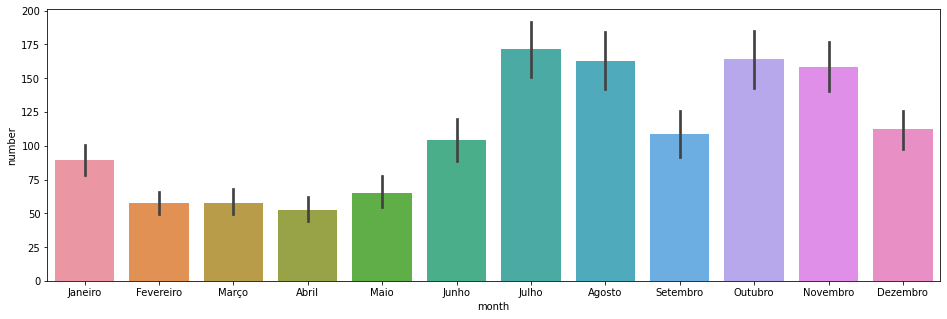

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x ='month',y='number',data=data)

In [ ]:
#In which year maximum no of forest fire has been reported
data_2 = data.groupby('year')['number'].sum().reset_index()

In [ ]:
data_2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


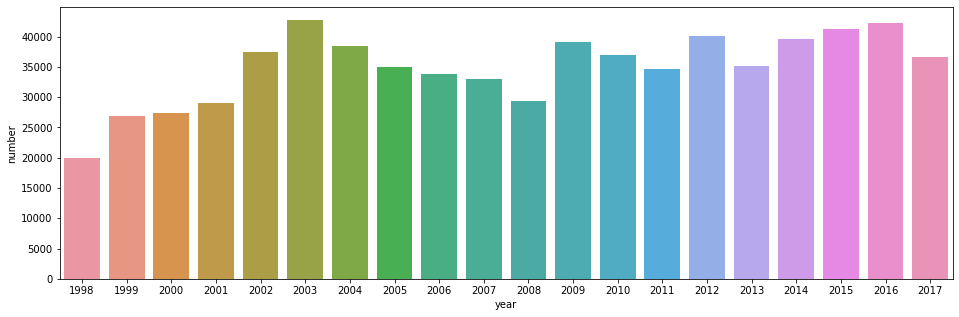

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x ='year',y='number',data=data_2)

In [ ]:
#in which state maximum no of forst fire has been reported
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
data_3 = data.groupby('state')['number'].sum().reset_index()

In [ ]:
data_3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


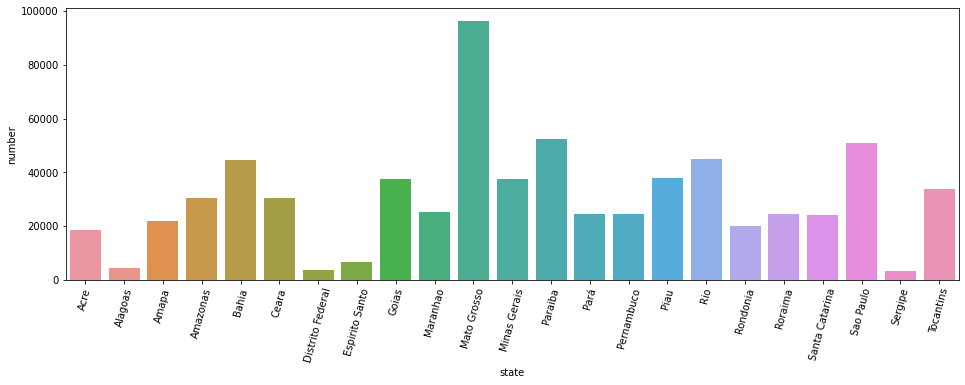

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x ='state',y='number',data=data_2)
plt.xticks(rotation=75)
plt.show()

In [ ]:
#find the total no of fires reported in amazon
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
data['state']

0            Acre
1            Acre
2            Acre
3            Acre
4            Acre
          ...    
6449    Tocantins
6450    Tocantins
6451    Tocantins
6452    Tocantins
6453    Tocantins
Name: state, Length: 6422, dtype: object

In [ ]:
data[data['state']=='Amazonas']

,year,state,month,number,date
718,1998,Amazonas,Janeiro,0.0,1998-01-01
719,1999,Amazonas,Janeiro,3.0,1999-01-01
720,2000,Amazonas,Janeiro,7.0,2000-01-01
721,2001,Amazonas,Janeiro,3.0,2001-01-01
722,2002,Amazonas,Janeiro,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01
953,2013,Amazonas,Dezembro,236.0,2013-01-01
954,2014,Amazonas,Dezembro,293.0,2014-01-01
955,2015,Amazonas,Dezembro,565.0,2015-01-01


In [ ]:
data[data['state']=='Amazonas']['number']

718      0.0
719      3.0
720      7.0
721      3.0
722     17.0
       ...  
952     80.0
953    236.0
954    293.0
955    565.0
956    133.0
Name: number, Length: 239, dtype: float64

In [ ]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

In [ ]:
#Display no of fires reported in amazonas yearwise
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
data_4 = data[data['state']=='Amazonas']

In [ ]:
data_5 = data_4.groupby('year')['number'].sum()


In [ ]:
data_5

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

In [ ]:
data_5 = data_4.groupby('year')['number'].sum().reset_index()

In [ ]:
data_5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


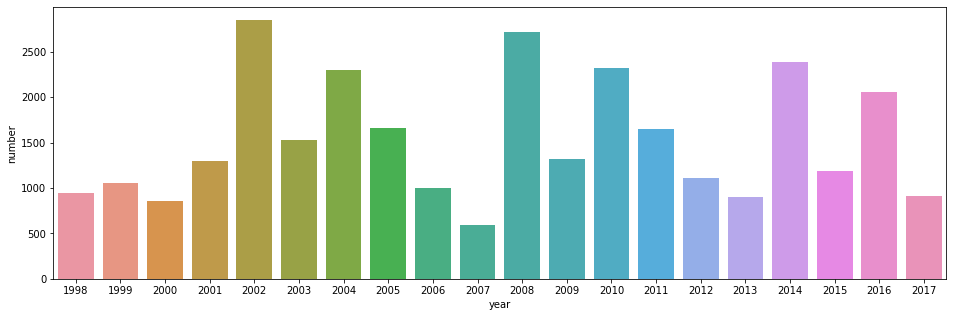

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data_5)
plt.show()

In [ ]:
#display no of fires reported in amazonas day wise
data.columns


In [ ]:
data_6 = data[data['state']=='Amazonas']

In [ ]:
data_6

,year,state,month,number,date
718,1998,Amazonas,Janeiro,0.0,1998-01-01
719,1999,Amazonas,Janeiro,3.0,1999-01-01
720,2000,Amazonas,Janeiro,7.0,2000-01-01
721,2001,Amazonas,Janeiro,3.0,2001-01-01
722,2002,Amazonas,Janeiro,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01
953,2013,Amazonas,Dezembro,236.0,2013-01-01
954,2014,Amazonas,Dezembro,293.0,2014-01-01
955,2015,Amazonas,Dezembro,565.0,2015-01-01


In [ ]:
data_6.groupby(data_6['date'].dt.dayofweek).sum().number


date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64

In [ ]:
#find the no of fires reported in 2015 and visualize data based on each month
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
fire=data[data['year']==2015].groupby('month')['number'].sum().reset_index()

In [ ]:
fire

,month,number
0,Abril,2573.000
1,Agosto,4363.125
2,Dezembro,4088.522
3,Fevereiro,2309.000
4,Janeiro,4635.000
5,Julho,4364.392
6,Junho,3260.552
7,Maio,2384.000
8,Março,2202.000
9,Novembro,4034.518


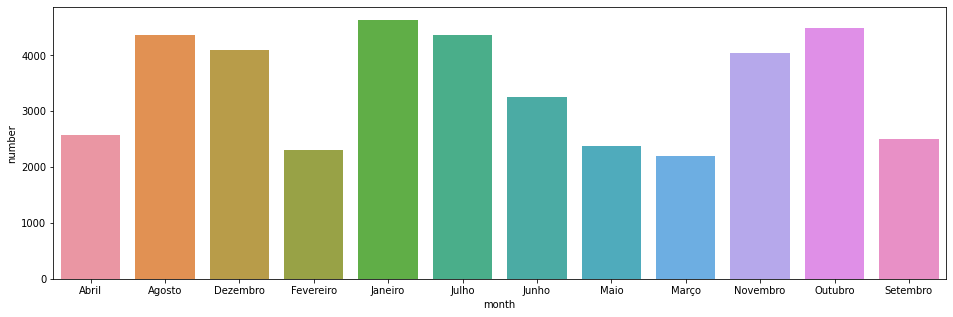

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='month',y='number',data=fire)

In [ ]:
#find the avg no of fires fro highest to lowest state wise
data_8=data.groupby('state')['number'].mean().sort_values(ascending=False)
data_8

state
Sao Paulo           213.896226
Mato Grosso         201.351523
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             109.698573
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  62.985865
Espirito Santo       27.389121
Alagoas              19.350000
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

In [ ]:
data_8=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data_8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


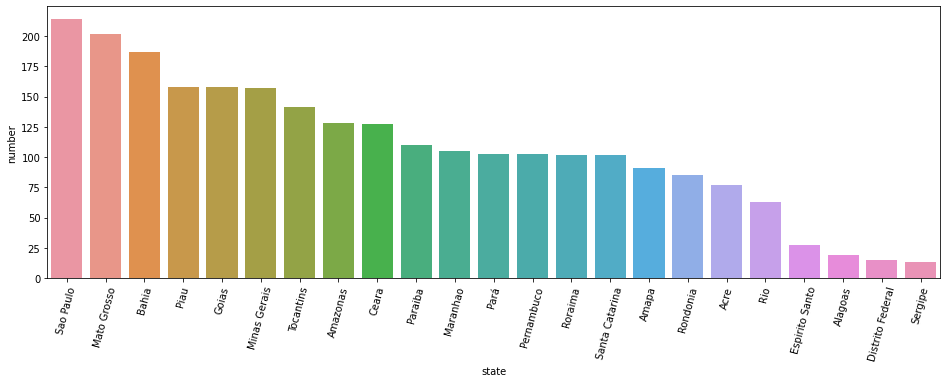

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data_8)
plt.xticks(rotation=75)
plt.show()

In [ ]:
#find the state name where fires are reported in december month
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
data[data['month']=='Dezembro']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)